In [1]:
import torch.nn.functional as F
import torchvision
import numpy as np
import torch
from matplotlib import pyplot as plt
from PIL import Image


def make_grid(images, size=64):

    output_im = Image.new("RGB", (size * len(images), size))

    for i, im in enumerate(images):
        output_im.paste(im.resize((size, size)), (i * size, 0))

    return output_im

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
# 加载一个管线pipeline
from diffusers import StableDiffusionPipeline

model_id = "sd-dreambooth-library/mr-potato-head"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)


safety_checker\model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

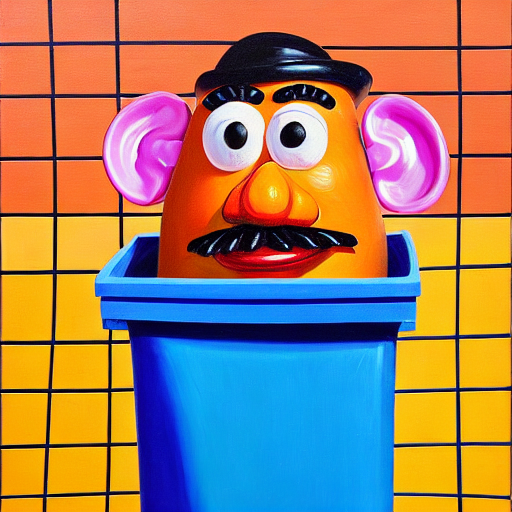

In [8]:
# sks是一个唯一标识符（UID）
prompt = "an abstract oil painting of sks mr potato head by picasso"
# prompt = "an abstract oil painting of sks mr potato head in garbage can"  # try other prompts to see what you get!
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]    # guidance_scale 决定模型输出与提示语之间的匹配程度
image


diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

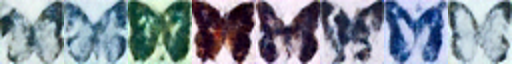

In [6]:
from diffusers import DDPMPipeline

butterfly_pipeline = DDPMPipeline.from_pretrained("johnowhitaker/ddpm-butterflies-32px").to(device)

images = butterfly_pipeline(batch_size=8).images
make_grid(images)